## Computing regression coefficients

This notebook walks through the steps involved in manual (pen and paper) computation of the optimal least squares regression coefficients, using the normal equations.

We’ll also show how to do each of these steps in Python, so that you can try other values for $X$ and $y$ and then check your work.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

We will start with the labeled data. Our data includes four samples, with two features:

$$ X =
\begin{bmatrix}
1 & 2 \\
2 & 3 \\
4 & 1 \\
5 & 5
\end{bmatrix},
y =
\begin{bmatrix}
3  \\
2 \\
7 \\
1
\end{bmatrix}
$$

In [2]:
X = [[1,2], [2, 3], [4, 1], [5, 5]]
y = [3, 2, 7, 1]

We can use `seaborn` to plot each column of $X$ versus $y$:

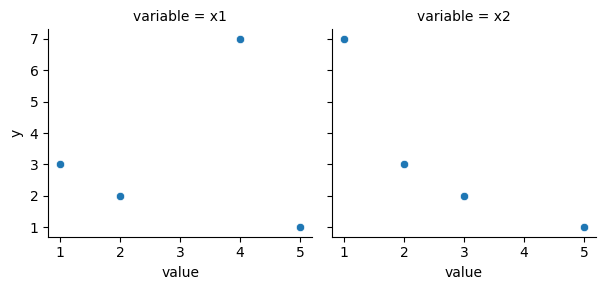

In [3]:
df = pd.DataFrame(X, columns = [ 'x1', 'x2'])
df = df.assign(y=y)

melted = df.melt(id_vars=['y'], value_vars=[ 'x1','x2'])
g = sns.FacetGrid(melted, col='variable', col_wrap=3);
g.map(sns.scatterplot, 'value', 'y');

Of course, we will assume a linear model. For a given sample:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2$$

Next, we will create a design matrix $A$ by horizontally “stacking” a vector of 1s and the matrix $X$:

$$ A =
\begin{bmatrix}
1 & 1 & 2 \\
1 & 2 & 3 \\
1 & 4 & 1 \\
1 & 5 & 5
\end{bmatrix},
$$

In [4]:
A = np.hstack((np.ones(4)[:,None], X))
A

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 4., 1.],
       [1., 5., 5.]])

Now we can represent our linear model more easily using matrices:

$$\hat{\mathbf{\hat{y}}} = A\mathbf{w}$$

where $\hat{\mathbf{\hat{y}}}$ and $\mathbf{w}$ are vectors.

The optimal least squares values for the vector $w$ are

$$w^* = (A^T A)^{-1} A^{T} \mathbf{y}$$

Note that the least-squares solutions are the solutions of the matrix equation

$$ A^T A \mathbf{w} = A^T \mathbf{y}$$

A matrix equation is in the form $Ax=b$, where $A$ is an $m \times n$ matrix and $b$ is a column vector with $m$ entries. It can be solved for $x$ by forming the augmented matrix $(A | b)$ and then using elementary row operations to get it in row reduced form.

Thus, to get $w$ we will:

-   Compute the matrix $A^T A$ and the vector $A^T y$.
-   Form the augmented matrix for the matrix equation $A^T A w = A^T y$: $(A^T A | A^T y)$
-   Row reduce to find the optimal value for $w$, \$w^\* \$.

The transpose of $A$, $A^T$, is the matrix whose rows are the columns of $A$:

$$ A^T =
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 2 & 4 & 5 \\
2 & 3 & 1 & 5
\end{bmatrix}
$$

In [5]:
A.T

array([[1., 1., 1., 1.],
       [1., 2., 4., 5.],
       [2., 3., 1., 5.]])

To solve

$$ A^T A w = A^T y$$

we’ll need $A^T A$:

$$ A^T A =
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 2 & 4 & 5 \\
2 & 3 & 1 & 5
\end{bmatrix}
\begin{bmatrix}
1 & 1 & 2 \\
1 & 2 & 3 \\
1 & 4 & 1 \\
1 & 5 & 5
\end{bmatrix} =
\begin{bmatrix}
4 & 12 & 11 \\
12 & 46 & 37 \\
11 & 37 & 39
\end{bmatrix}
$$

In [6]:
A.T.dot(A)

array([[ 4., 12., 11.],
       [12., 46., 37.],
       [11., 37., 39.]])

and $A^T y$:

$$ A^T y =
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 2 & 4 & 5 \\
2 & 3 & 1 & 5
\end{bmatrix}
\begin{bmatrix}
3  \\
2 \\
7 \\
1
\end{bmatrix} =
\begin{bmatrix}
13 \\
40 \\
24
\end{bmatrix}
$$

In [7]:
A.T.dot(y)

array([13., 40., 24.])

Next, create the augmented matrix $(A^T A | A^T y)$:

$$ (A^T A | A^T y)=
\begin{bmatrix}
4  & 12 & 11 & | & 13 \\
12 & 46 & 37 & | & 40 \\
11 & 37 & 39 & | & 24
\end{bmatrix}
$$

In [8]:
M1 = np.hstack([A.T.dot(A), A.T.dot(y)[:,None]])
M1

array([[ 4., 12., 11., 13.],
       [12., 46., 37., 40.],
       [11., 37., 39., 24.]])

We will perform some elementary row operations on the augmented matrix to get $A^T A$ in row reduced form:

In [9]:
M2 = np.vstack([M1[0], M1[1]-3*M1[0], 4*M1[2]-11*M1[0]])
M2

array([[  4.,  12.,  11.,  13.],
       [  0.,  10.,   4.,   1.],
       [  0.,  16.,  35., -47.]])

In [10]:
M3 = np.vstack([M2[0], M2[1], 5*M2[2]-8*M2[1]])
M3

array([[   4.,   12.,   11.,   13.],
       [   0.,   10.,    4.,    1.],
       [   0.,    0.,  143., -243.]])

In [11]:
M4 = np.vstack([M3[0], 143*M3[1]-4*M3[2], M3[2]])
M4

array([[   4.,   12.,   11.,   13.],
       [   0., 1430.,    0., 1115.],
       [   0.,    0.,  143., -243.]])

In [12]:
M5 = np.vstack([143/2*(M4[0]-12/1430*M4[1] - 11/143*M4[2]), M4[1], M4[2]])
M5

array([[ 286.,    0.,    0., 1597.],
       [   0., 1430.,    0., 1115.],
       [   0.,    0.,  143., -243.]])

In [13]:
M6 = np.vstack([M5[0]/286, M5[1]/1430, M5[2]/143])
M6

array([[ 1.        ,  0.        ,  0.        ,  5.58391608],
       [ 0.        ,  1.        ,  0.        ,  0.77972028],
       [ 0.        ,  0.        ,  1.        , -1.6993007 ]])

When we’re finished, our augmented matrix looks like this:

$$
\begin{bmatrix}
1 & 0 & 0 & | & \frac{1597}{286} \\
0 & 1 & 0 & | & \frac{1115}{1430} \\
0 & 0 & 1 & | & \frac{-243}{143}
\end{bmatrix}
$$

and so

$$ w^* = \left[ \frac{1597}{286}, \frac{1115}{1430}, \frac{-243}{143} \right] $$

In [14]:
M6[:,3]

array([ 5.58391608,  0.77972028, -1.6993007 ])

Compare this to the known solution:

In [15]:
np.linalg.inv( A.T.dot(A) ).dot(A.T.dot(y))

array([ 5.58391608,  0.77972028, -1.6993007 ])